## Holiday package 

XGboost machine learning algorithm 

In [1]:
## importing important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df=pd.read_csv("datasets/Travel.csv")
df=pd.DataFrame(df)
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:

df['Gender'].value_counts()
## we must check dataset very careafully so that any problem will not happen in it .
df['MaritalStatus'].value_counts()
## single and unmarried same hona chaiye
df['TypeofContact'].value_counts()
df['Occupation'].value_counts()
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [4]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [5]:
## Checking missing values 
###these are the features with nan value 
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na :
    print(feature,np.round(df[feature].isnull().mean()*100,5), ' % missing values '  )
    

Age 4.62357  % missing values 
TypeofContact 0.51146  % missing values 
DurationOfPitch 5.13502  % missing values 
NumberOfFollowups 0.92062  % missing values 
PreferredPropertyStar 0.53191  % missing values 
NumberOfTrips 2.86416  % missing values 
NumberOfChildrenVisiting 1.35025  % missing values 
MonthlyIncome 4.76678  % missing values 


In [6]:
## statistics on numerical columns ( Null columns)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [7]:
## Age 
df.Age.fillna(df.Age.median(),inplace=True)

## TypeofContract 
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

## DurationofPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

## NumberofFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode(),inplace=True)

## PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode(),inplace=True)

## NumberofTrips 
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

##NumbeofchildrenVisiting 
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode(),inplace=True)


df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


In [ ]:
## create new column for feature 
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'])


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [9]:

## get all all numeric Features 
num_features = [ feature for feature in df.columns if df[feature].dtype!='O']
print(num_features)


['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TotalVisiting']


In [10]:
## catergorical features 
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O' ]
print('Number of categorical features:',len(cat_features))

Number of categorical features: 6


In [11]:
## Discrete features 
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25 ]
print('Number of Discrete features:',len(cat_features))

Number of Discrete features: 6


In [12]:
## Continuor features 
Continous_features=[feature for feature in num_features if feature  not in discrete_features]
print('Number of continous features :' , len(Continous_features))

Number of continous features : 4


In [13]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
Y=df['ProdTaken']


In [14]:

X.dropna(inplace=True)
X.reset_index(drop=True, inplace=True)
print(len(X))
print(len(Y))
Y = Y[X.index]          # Keep only rows corresponding to remaining X
Y.reset_index(drop=True, inplace=True)  # Optional: reset index in Y too
print(len(X))
print(len(Y))


4518
4888
4518
4518


In [15]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,test_size=0.33,random_state=42)

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
X_TRAIN=pd.DataFrame(X_TRAIN)  ##  changing numpydarray into the dataframe 
X_TEST=pd.DataFrame(X_TEST)     ## changing numpydarray into the dataframe
cat_features = X_TRAIN.select_dtypes(include="object").columns
num_features = X_TRAIN.select_dtypes(exclude="object").columns

# 5️⃣ Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

# 6️⃣ Combine
preprocessor = ColumnTransformer([
    ("onehot", oh_transformer, cat_features),
    ("scaler", numeric_transformer, num_features)
])

# 7️⃣ Apply only on X (not Y)
X_TRAIN = preprocessor.fit_transform(X_TRAIN)
X_TEST = preprocessor.transform(X_TEST)



In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
xgboost=XGBClassifier()
xgboost.fit(X_TRAIN,Y_TRAIN)





,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [18]:
y_pred=xgboost.predict(X_TEST)

In [19]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], shape=(1491,))

In [20]:
y_pred
print(len(Y_TEST))
print(len(y_pred))
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score,roc_auc_score,recall_score,roc_curve
# y_pred is predictions for X_TEST
print("Test Accuracy:", accuracy_score(Y_TEST, y_pred))
print("Test F1 Score:", f1_score(Y_TEST, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(Y_TEST, y_pred))
print("Classification Report:\n", classification_report(Y_TEST, y_pred))


1491
1491
Test Accuracy: 0.8061703554661301
Test F1 Score: 0.7588715419916359
Confusion Matrix:
 [[1170   45]
 [ 244   32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1215
           1       0.42      0.12      0.18       276

    accuracy                           0.81      1491
   macro avg       0.62      0.54      0.54      1491
weighted avg       0.75      0.81      0.76      1491



In [21]:
## Hyperparameter traing 
rf_params={                             ### randomforest parameters 
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]}

In [22]:
xgb_params = {
    "n_estimators": [100, 200, 500, 1000],      # Number of trees
    "max_depth": [3, 5, 7, 10, None],           # Maximum depth of each tree
    "learning_rate": [0.01, 0.05, 0.1, 0.2],   # Step size shrinkage (eta)
    "min_child_weight": [1, 3, 5, 10],          # Minimum sum of instance weight in child
    "subsample": [0.6, 0.8, 1.0],               # Fraction of training data used per tree
    "colsample_bytree": [0.6, 0.8, 1.0],        # Fraction of features used per tree
    "gamma": [0, 0.1, 0.5, 1],                  # Minimum loss reduction to split
    "reg_alpha": [0, 0.01, 0.1],                # L1 regularization on leaf weights
    "reg_lambda": [1, 1.5, 2]                   # L2 regularization on leaf weights
}

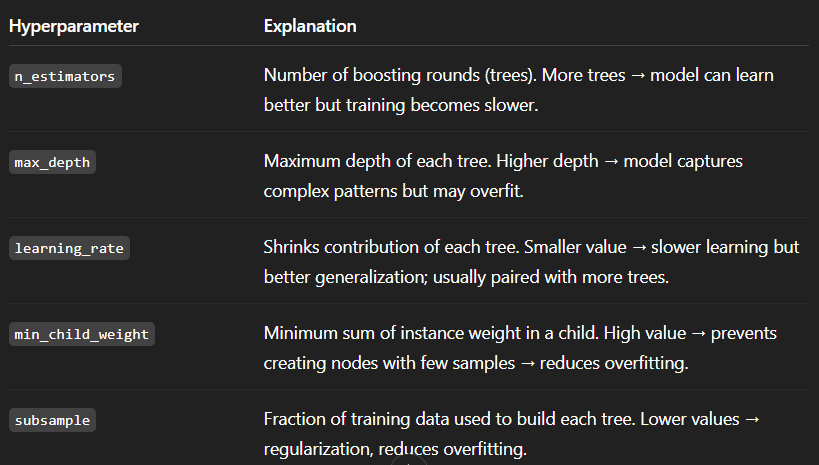
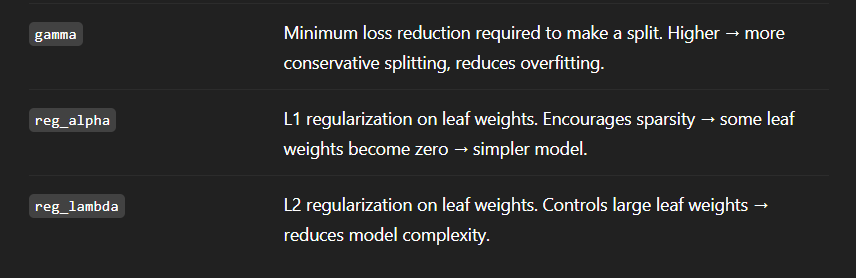

In [23]:
from sklearn.ensemble import RandomForestClassifier
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
    ("Xgboost",XGBClassifier(),xgb_params)
]

In [ ]:
randomcv_models


[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  {'n_e

In [25]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_TRAIN,Y_TRAIN)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f"------------------------Best Params for {model_name}---------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------------Best Params for RF---------------------------
{'n_estimators': 100, 'min_samples_split': 15, 'max_features': 8, 'max_depth': None}
------------------------Best Params for Xgboost---------------------------
{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}


In [26]:
models={
    "Random Forest":RandomForestClassifier(n_estimators= 200, min_samples_split= 15, max_features= 8, max_depth= 10),
   " Xgboost":XGBClassifier(subsample=1.0, reg_lambda= 1, reg_alpha= 0.01, n_estimators=100, min_child_weight= 3, max_depth=10, learning_rate= 0.05, gamma= 0.5, colsample_bytree=0.6)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_TRAIN,Y_TRAIN)    ## training this model
    ## making the predictions 
    y_train_pred=model.predict(X_TRAIN)
    y_test_pred=model.predict(X_TEST)

## training the set performance 
model_train_accuracy=accuracy_score(Y_TRAIN,y_train_pred)
model_train_f1=f1_score(Y_TRAIN,y_train_pred,average='weighted')
model_train_prediction=precision_score(Y_TRAIN,y_train_pred)
model_train_rocauc_score=roc_auc_score(Y_TRAIN,y_train_pred)
model_train_recall=recall_score(Y_TRAIN,y_train_pred)

## testing the set performance 
test_accuracy = accuracy_score(Y_TEST, y_test_pred)
test_f1 = f1_score(Y_TEST, y_test_pred, average='weighted')
test_precision = precision_score(Y_TEST, y_test_pred, average='weighted')
test_recall = recall_score(Y_TEST, y_test_pred, average='weighted')

try:
    test_rocauc = roc_auc_score(Y_TEST, model.predict_proba(X_TEST), multi_class='ovr')
except:
    test_rocauc = None
    
    
# ✅ Training metrics
print("=== Training Metrics ===")
print("Accuracy:", model_train_accuracy)
print("F1 Score:", model_train_f1)
print("Precision:", model_train_prediction)  # Rename variable to avoid confusion
print("Recall:", model_train_recall)
print("ROC AUC Score:", model_train_rocauc_score)

# ✅ Testing metrics for adaboost
print("\n=== Testing Metrics adaboost")
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("ROC AUC Score:", test_rocauc)



=== Training Metrics ===
Accuracy: 0.853980839114635
F1 Score: 0.8054122652027558
Precision: 0.9866666666666667
Recall: 0.1436893203883495
ROC AUC Score: 0.5716456156081876

=== Testing Metrics adaboost
Accuracy: 0.8289738430583501
F1 Score: 0.7656714817674382
Precision: 0.8445588126302151
Recall: 0.8289738430583501
ROC AUC Score: None



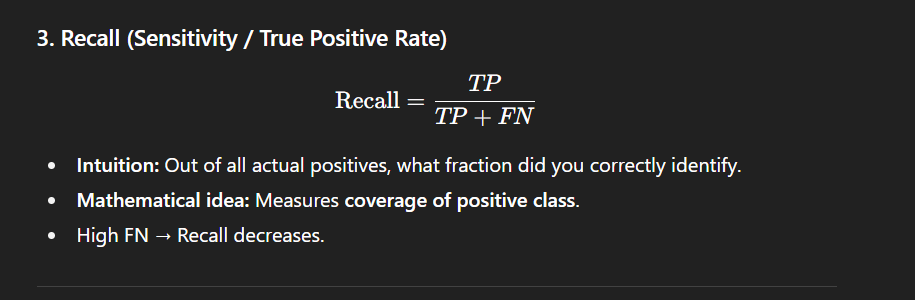
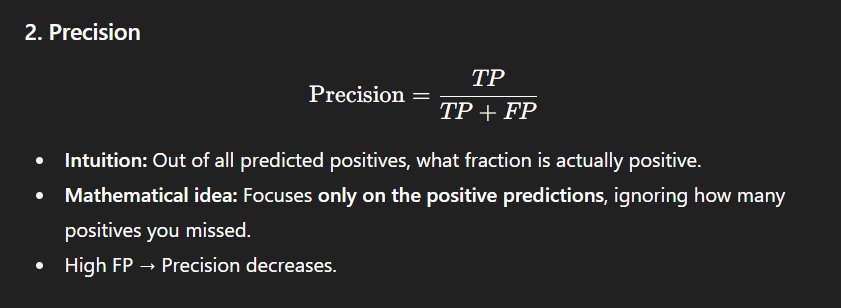
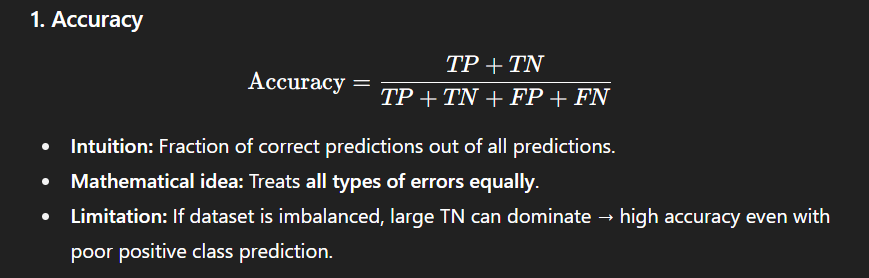
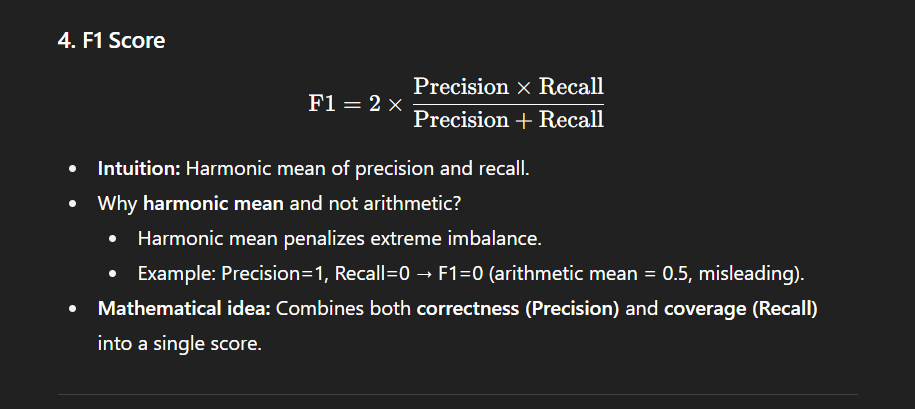
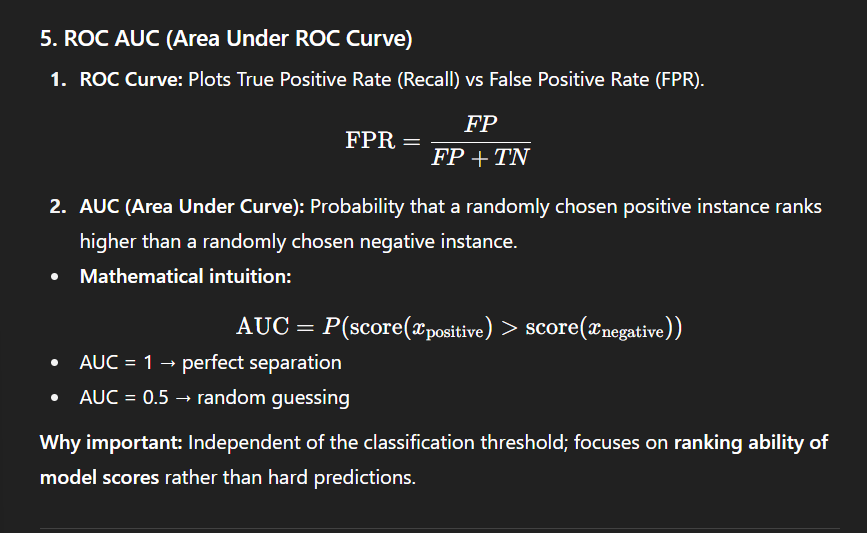
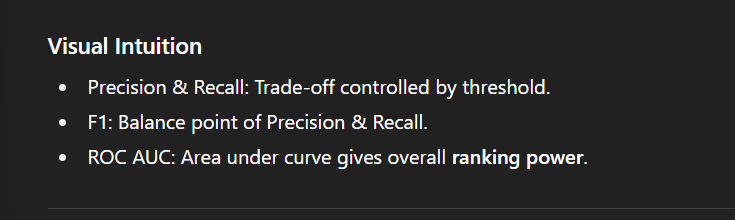

In [27]:
##plot roc auv curve 
from sklearn.metrics import roc_auc_score
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [28]:
### addd models to the list that you want to view on the roc plot 
auc_models=[
    {
        'label':'adaboostClassifier',
        'model':XGBClassifier(subsample=1.0, reg_lambda= 1, reg_alpha= 0.01, n_estimators=100, min_child_weight= 3, max_depth=10, learning_rate= 0.05, gamma= 0.5, colsample_bytree=0.6),
        'auc':0.8325
    },
    
]

Text(0.5, 1.0, ' ROC CURVE Receiver Operating Characteristic')

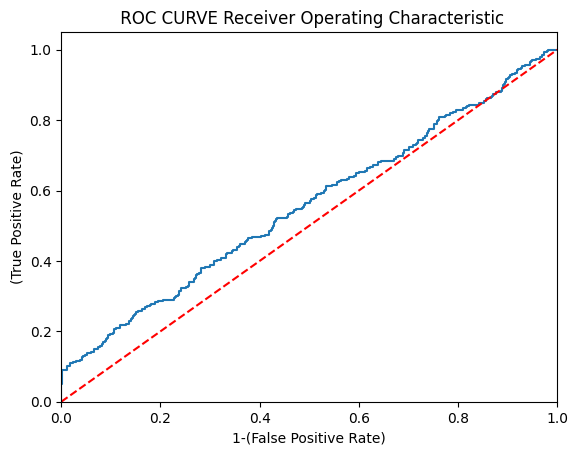

In [29]:

# create loop through all model
for algo in auc_models:
    model=algo['model']
    model.fit(X_TRAIN,Y_TRAIN)
    fpr, tpr, thresholds = roc_curve(Y_TEST, model.predict_proba(X_TEST)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-(False Positive Rate)')
plt.ylabel('(True Positive Rate)')
plt.title(' ROC CURVE Receiver Operating Characteristic')

    


In [44]:
from sklearn.model_selection import train_test_split

# Split
X = df.drop(['MonthlyIncome'], axis=1)
Y = df['MonthlyIncome']

# Drop missing rows before split
X = X.dropna()
Y = Y.loc[X.index]

# Split into train/test
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.33, random_state=42)

# Drop missing values (if needed) after combining back
train_data = pd.concat([X_TRAIN, Y_TRAIN], axis=1).dropna()
X_TRAIN = train_data.drop('MonthlyIncome', axis=1)
Y_TRAIN = train_data['MonthlyIncome']


In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
X_TRAIN=pd.DataFrame(X_TRAIN)  ##  changing numpydarray into the dataframe 
X_TEST=pd.DataFrame(X_TEST)     ## changing numpydarray into the dataframe
cat_features = X_TRAIN.select_dtypes(include="object").columns
num_features = X_TRAIN.select_dtypes(exclude="object").columns

# 5️⃣ Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

# 6️⃣ Combine
preprocessor = ColumnTransformer([
    ("onehot", oh_transformer, cat_features),
    ("scaler", numeric_transformer, num_features)
])

# 7️⃣ Apply only on X (not Y)
X_TRAIN = preprocessor.fit_transform(X_TRAIN)
X_TEST = preprocessor.transform(X_TEST)


In [ ]:
## Import necessary libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor()
    
}

## Dictionary to store model performance
model_results = {}

## Training and Evaluation Loop
for name, model in models.items():
    model.fit(X_TRAIN, Y_TRAIN)              # Train model
    y_pred = model.predict(X_TEST)           # Make predictions on test data
   
    # Evaluation metrics
    r2 = r2_score(Y_TEST, y_pred)
    mse = mean_squared_error(Y_TEST, y_pred)
    mae = mean_absolute_error(Y_TEST, y_pred)

    model_results[name] = {
        "R2 Score": r2,
        "MSE": mse,
        "MAE": mae
    }

## Display results
## Training and Evaluation Loop
for name, model in models.items():
    model.fit(X_TRAIN, Y_TRAIN)
    y_pred = model.predict(X_TEST)
   
    # Evaluation metrics
    r2 = r2_score(Y_TEST, y_pred)
    mse = mean_squared_error(Y_TEST, y_pred)
    mae = mean_absolute_error(Y_TEST, y_pred)
    accuracy = r2 * 100  # simple accuracy measure from R2

    model_results[name] = {
        "R2 Score": r2,
        "MSE": mse,
        "MAE": mae,
        "Accuracy (%)": accuracy
    }

    # ✅ Display predicted values for first 5 samples
    print(f"\n{name} Predictions (first 5):")
    print("Predicted:", y_pred[:5])
    print("Actual   :", Y_TEST[:5].values)
    print("-" * 40)


ValueError: could not convert string to float: 'Self Enquiry'